In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
import pandas as pd
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
companies_file_path = os.getenv('COMPANIES_JSON_FILE_PATH')
links_file_path = os.getenv('LINKS_JSON_FILE_PATH')

In [3]:
# Companies.json -> https://query.data.world/s/k7ib3ovtm7w5aseritn4sdv6bqrhwe?dws=00000
companies_json = pd.read_json(companies_file_path, lines=True)

In [4]:
# Links.json -> https://query.data.world/s/x2qsj7pr75w7ouieifaf3whaiw4cbb?dws=00000
links_json = pd.read_json(links_file_path, lines=True)

In [5]:
companies_json.head()

,_id,update_time,domain,name,username
0,{'$oid': '54dd19c08899a4c549dc71cd'},{'$date': '2015-03-31T17:14:48.439-0700'},f5.com,F5 Networks,rjurney
1,{'$oid': '54dd19c08899a4c549dc71ce'},{'$date': '2015-04-09T15:13:18.808-0700'},dell.com,Dell,rjurney
2,{'$oid': '54dd19c08899a4c549dc71d0'},{'$date': '2015-03-25T22:56:10.886-0700'},att.com,AT&T,rjurney
3,{'$oid': '54dd19c08899a4c549dc71d2'},{'$date': '2015-04-10T13:16:46.234-0700'},verizon.com,Verizon,rjurney
4,{'$oid': '54dd19c08899a4c549dc71d4'},{'$date': '2015-04-10T14:36:18.843-0700'},hp.com,Hewlett Packard,rjurney


In [6]:
links_json.head()

,_id,home_name,link_name,type,update_time,home_domain,link_domain,username,name
0,{'$oid': '54dd19c08899a4c549dc71cf'},F5 Networks,Dell,partnership,{'$date': '2015-02-12T21:23:12.929Z'},f5.com,dell.com,rjurney,NaN
1,{'$oid': '54dd19c08899a4c549dc71d1'},F5 Networks,AT&T,partnership,{'$date': '2015-02-12T21:23:12.932Z'},f5.com,att.com,rjurney,NaN
2,{'$oid': '54dd19c08899a4c549dc71d3'},F5 Networks,Verizon,partnership,{'$date': '2015-02-12T21:23:12.932Z'},f5.com,verizon.com,rjurney,NaN
3,{'$oid': '54dd19c08899a4c549dc71d5'},F5 Networks,Hewlett Packard,partnership,{'$date': '2015-02-12T21:23:12.933Z'},f5.com,hp.com,rjurney,NaN
4,{'$oid': '54dd19c08899a4c549dc71d7'},F5 Networks,IBM,partnership,{'$date': '2015-02-12T21:23:12.934Z'},f5.com,ibm.com,rjurney,NaN


In [7]:
companies_df = pd.DataFrame(companies_json)
links_df = pd.DataFrame(links_json)

In [8]:
load_dotenv()
sp500_csv_file_path = os.getenv('SP500_CSV_FILE_PATH')
sp500_df = pd.read_csv(sp500_csv_file_path)

In [9]:
sp500_df.head()

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care


In [10]:
# FILTER

sp500_companies = companies_df[companies_df['name'].str.lower().isin(sp500_df['Name'].str.lower())]

sp500_links = links_df[
    links_df['home_name'].str.lower().isin(sp500_companies['name'].str.lower()) & links_df['link_name'].str.lower().isin(sp500_companies['name'].str.lower())
]

In [11]:
len(sp500_companies)

303

In [12]:
sp500_companies.head()

,_id,update_time,domain,name,username
0,{'$oid': '54dd19c08899a4c549dc71cd'},{'$date': '2015-03-31T17:14:48.439-0700'},f5.com,F5 Networks,rjurney
2,{'$oid': '54dd19c08899a4c549dc71d0'},{'$date': '2015-03-25T22:56:10.886-0700'},att.com,AT&T,rjurney
5,{'$oid': '54dd19c08899a4c549dc71d6'},{'$date': '2015-04-10T14:36:18.843-0700'},ibm.com,IBM,rjurney
12,{'$oid': '54dd63368899a4c549dc71e6'},{'$date': '2015-04-10T13:32:43.647-0700'},juniper.net,Juniper Networks,rjurney
36,{'$oid': '54e4e4368899a4c549dc7219'},{'$date': '2015-04-10T14:36:18.843-0700'},oracle.com,Oracle,rjurney


In [13]:
len(sp500_links)

4901

In [14]:
sp500_df['Name'] = sp500_df['Name'].str.lower()
sp500_companies['name'] = sp500_companies['name'].str.lower()
sp500_merged = sp500_companies.merge(sp500_df, left_on='name', right_on='Name', how='left').drop('Name', axis=1)


C:\Users\stefa\AppData\Local\Temp\ipykernel_3608\2800697953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_companies['name'] = sp500_companies['name'].str.lower()


In [15]:
sp500_merged.head(50)

,_id,update_time,domain,name,username,Symbol,Sector
0,{'$oid': '54dd19c08899a4c549dc71cd'},{'$date': '2015-03-31T17:14:48.439-0700'},f5.com,f5 networks,rjurney,FFIV,Information Technology
1,{'$oid': '54dd19c08899a4c549dc71d0'},{'$date': '2015-03-25T22:56:10.886-0700'},att.com,at&t,rjurney,T,Communication Services
2,{'$oid': '54dd19c08899a4c549dc71d6'},{'$date': '2015-04-10T14:36:18.843-0700'},ibm.com,ibm,rjurney,IBM,Information Technology
3,{'$oid': '54dd63368899a4c549dc71e6'},{'$date': '2015-04-10T13:32:43.647-0700'},juniper.net,juniper networks,rjurney,JNPR,Information Technology
4,{'$oid': '54e4e4368899a4c549dc7219'},{'$date': '2015-04-10T14:36:18.843-0700'},oracle.com,oracle,rjurney,ORCL,Information Technology
5,{'$oid': '54e4e4368899a4c549dc721b'},{'$date': '2015-04-10T13:32:43.647-0700'},microsoft.com,microsoft,rjurney,MSFT,Information Technology
6,{'$oid': '54e4e4368899a4c549dc7226'},{'$date': '2015-04-01T14:35:54.038-0700'},fortinet.com,fortinet,rjurney,FTNT,Information Technology
7,{'$oid': '54e7bed88899a4c549dc731e'},{'$date': '2015-02-20T15:10:16.061-0800'},americanexpress.com,american express,rjurney,AXP,Financials
8,{'$oid': '54e7bed88899a4c549dc7355'},{'$date': '2015-04-10T14:36:18.843-0700'},intuit.com,intuit,rjurney,INTU,Information Technology
9,{'$oid': '54e7bed88899a4c549dc7367'},{'$date': '2015-02-20T15:10:16.099-0800'},mastercard.com,mastercard,rjurney,MA,Information Technology


In [16]:
len(sp500_merged)

303

In [17]:
sp500_links.head()

,_id,home_name,link_name,type,update_time,home_domain,link_domain,username,name
1,{'$oid': '54dd19c08899a4c549dc71d1'},F5 Networks,AT&T,partnership,{'$date': '2015-02-12T21:23:12.932Z'},f5.com,att.com,rjurney,NaN
4,{'$oid': '54dd19c08899a4c549dc71d7'},F5 Networks,IBM,partnership,{'$date': '2015-02-12T21:23:12.934Z'},f5.com,ibm.com,rjurney,NaN
481,{'$oid': '54fa653a8899a4c549dc757c'},Accenture,Microsoft,partnership,{'$date': '2015-06-05T19:03:40.812Z'},accenture.com,microsoft.com,rjurney,NaN
482,{'$oid': '54fa653a8899a4c549dc757d'},Accenture,Oracle,partnership,{'$date': '2015-06-05T19:03:40.812Z'},accenture.com,oracle.com,rjurney,NaN
2014,{'$oid': '55109d186944fe1f26541ff3'},Arista Networks,Intel,partnership,{'$date': '2015-03-23T23:09:12.039Z'},arista.com,intel.com,rjurney,NaN


In [18]:
# Drop Duplicates

sp500_merged = sp500_merged.drop_duplicates(subset=['name'])
sp500_links = sp500_links.drop_duplicates(subset=['home_name', 'link_name', 'type'])

In [19]:
sp500_links['home_name'] = sp500_links['home_name'].str.lower()
sp500_links['link_name'] = sp500_links['link_name'].str.lower()

In [20]:
company_names = sp500_companies['name']

filtered_links = sp500_links[
    sp500_links['home_name'].isin(company_names) &
    sp500_links['link_name'].isin(company_names)
]

print(len(filtered_links))

4899


In [21]:
duplicates = filtered_links.duplicated(subset=['home_name', 'link_name'])
print(duplicates.sum())

1660


There are 1660 pairs that are connected with different type of links. What would the solution be?
1. Create list of types for each edge and add it as an attribute.

In [22]:
sp500_merged

,_id,update_time,domain,name,username,Symbol,Sector
0,{'$oid': '54dd19c08899a4c549dc71cd'},{'$date': '2015-03-31T17:14:48.439-0700'},f5.com,f5 networks,rjurney,FFIV,Information Technology
1,{'$oid': '54dd19c08899a4c549dc71d0'},{'$date': '2015-03-25T22:56:10.886-0700'},att.com,at&t,rjurney,T,Communication Services
2,{'$oid': '54dd19c08899a4c549dc71d6'},{'$date': '2015-04-10T14:36:18.843-0700'},ibm.com,ibm,rjurney,IBM,Information Technology
3,{'$oid': '54dd63368899a4c549dc71e6'},{'$date': '2015-04-10T13:32:43.647-0700'},juniper.net,juniper networks,rjurney,JNPR,Information Technology
4,{'$oid': '54e4e4368899a4c549dc7219'},{'$date': '2015-04-10T14:36:18.843-0700'},oracle.com,oracle,rjurney,ORCL,Information Technology
...,...,...,...,...,...,...,...
287,{'$oid': '574e51413bf9e624d32f0949'},{'$date': '2016-05-31T15:10:49.194-0700'},leggett.com,leggett & platt,book,LEG,Consumer Discretionary
288,{'$oid': '574e73923bf9e624d3303628'},{'$date': '2016-05-31T15:10:49.194-0700'},kcsouthern.com,kansas city southern,book,KSU,Industrials
289,{'$oid': '574e8f083bf9e624d330edb5'},{'$date': '2016-05-31T15:10:49.194-0700'},copart.com,copart,book,CPRT,Industrials
290,{'$oid': '574e90ee3bf9e624d330fa6d'},{'$date': '2016-05-31T15:10:49.194-0700'},thermofisher.com,thermo fisher scientific,book,TMO,Health Care


In [23]:
G = nx.Graph()

for _, company in sp500_merged.iterrows():
    node_id = company['name']
    features = {'name': company['name'], 'symbol': company['Symbol'], 'sector': company['Sector']}
    G.add_node(node_id, **features)

for _, link in filtered_links.iterrows():
    home_id = link["home_name"]
    link_id = link["link_name"]
    relationship_type = link["type"]

    # Check if the edge already exists
    if G.has_edge(home_id, link_id) and relationship_type not in G[home_id][link_id]['types']:
        # If the edge exists, update the 'types' attribute with the new type
        G[home_id][link_id]['types'].append(relationship_type)
    else:
        # If the edge doesn't exist, add it with a 'types' attribute
        G.add_edge(home_id, link_id, types=[relationship_type])


In [24]:
print(G.number_of_nodes())
print(G.number_of_edges())

287
2169


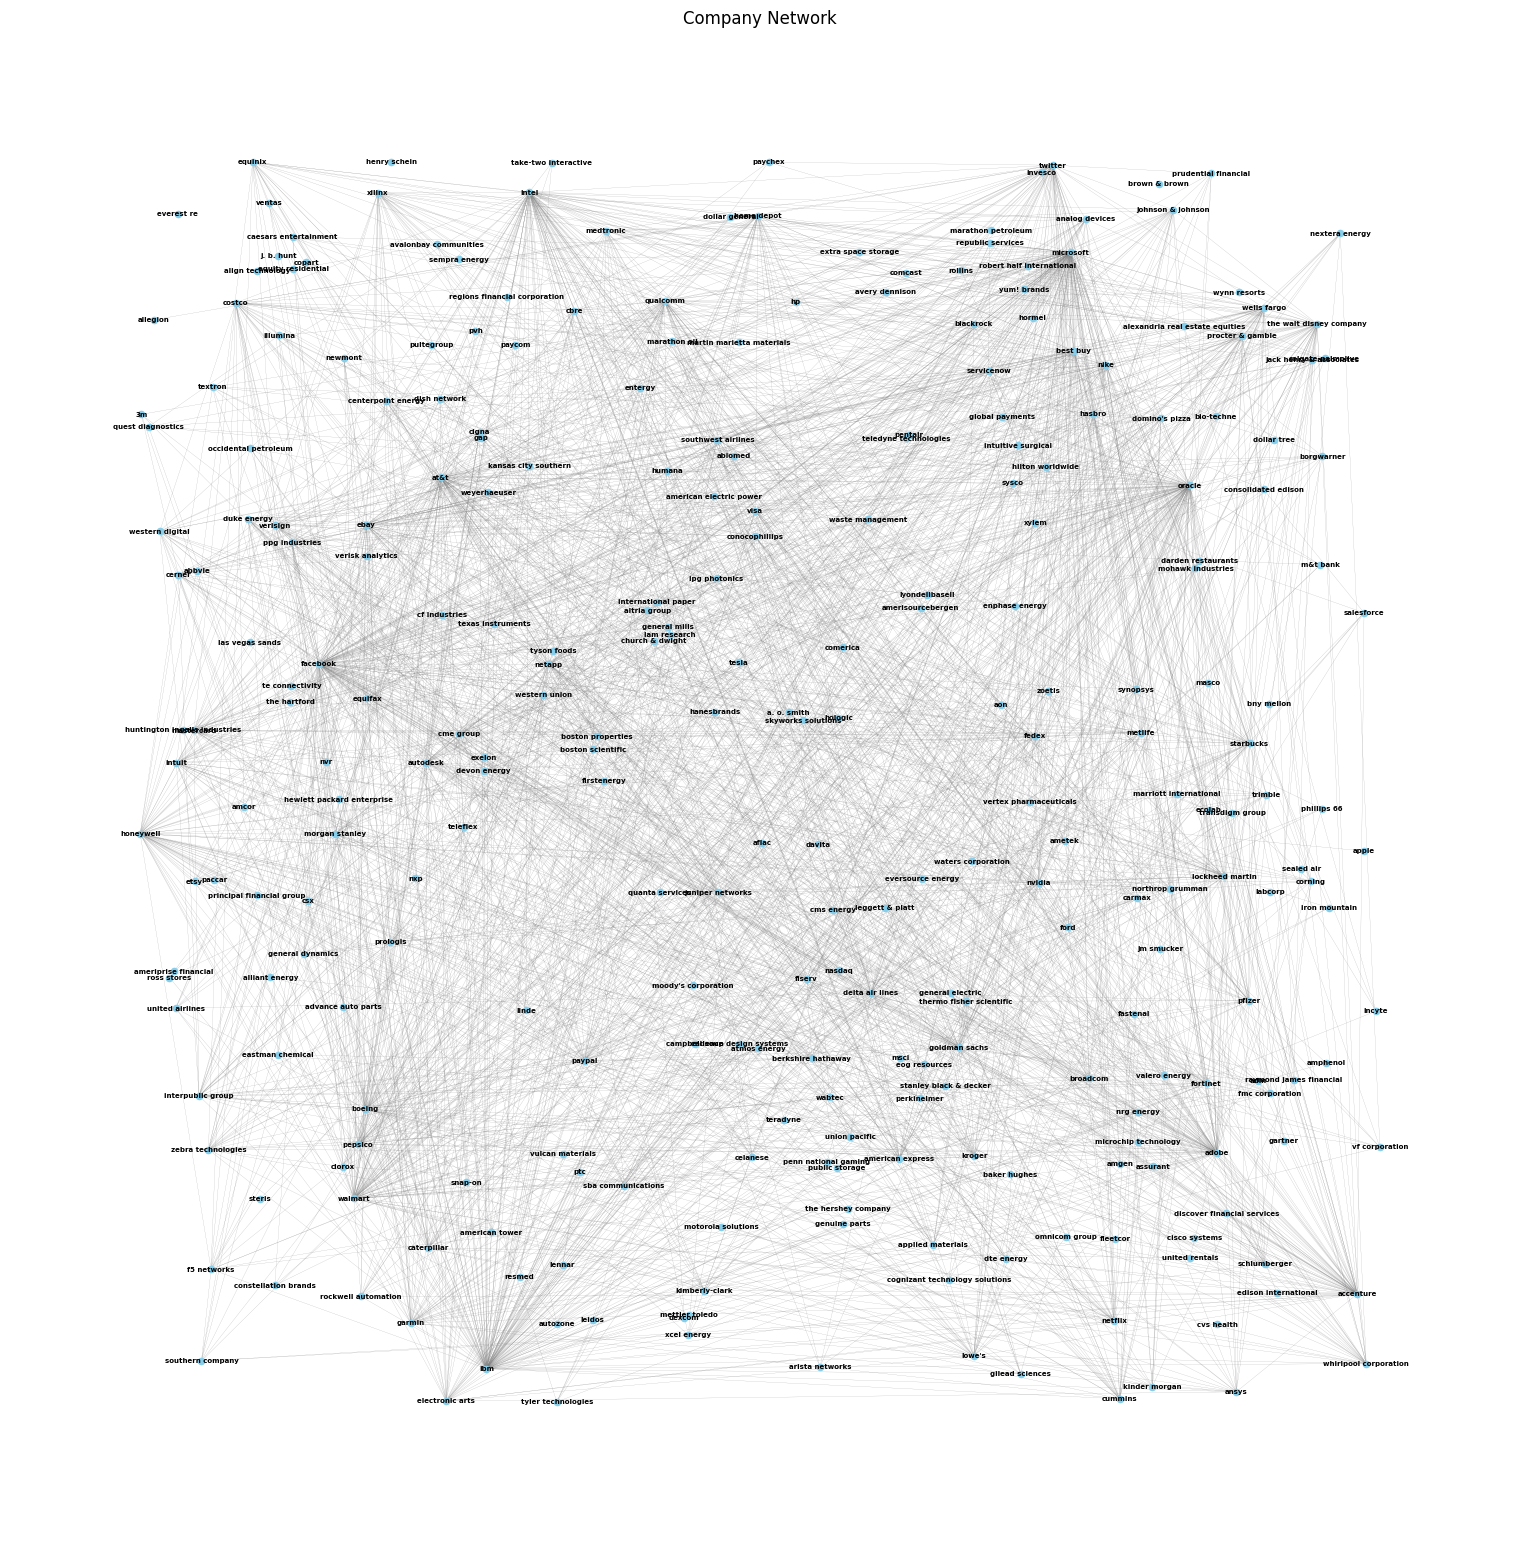

In [25]:
plt.figure(figsize=(15, 15))

pos = nx.random_layout(G)
nx.draw(G, pos, with_labels=True, font_size=5, node_size=20, node_color="skyblue", font_color="black", font_weight="bold", edge_color="gray", width=0.1)
plt.title("Company Network")
plt.show()

In [26]:
# Print nodes and their attributes
print("Nodes:")
for node_id, attributes in G.nodes(data=True):
    print(f"Node {node_id}: {attributes}")

# Print edges and their attributes
print("\nEdges:")
for edge in G.edges(data=True):
    print(f"Edge {edge[:2]}: {edge[2]}")

Nodes:
Node f5 networks: {'name': 'f5 networks', 'symbol': 'FFIV', 'sector': 'Information Technology'}
Node at&t: {'name': 'at&t', 'symbol': 'T', 'sector': 'Communication Services'}
Node ibm: {'name': 'ibm', 'symbol': 'IBM', 'sector': 'Information Technology'}
Node juniper networks: {'name': 'juniper networks', 'symbol': 'JNPR', 'sector': 'Information Technology'}
Node oracle: {'name': 'oracle', 'symbol': 'ORCL', 'sector': 'Information Technology'}
Node microsoft: {'name': 'microsoft', 'symbol': 'MSFT', 'sector': 'Information Technology'}
Node fortinet: {'name': 'fortinet', 'symbol': 'FTNT', 'sector': 'Information Technology'}
Node american express: {'name': 'american express', 'symbol': 'AXP', 'sector': 'Financials'}
Node intuit: {'name': 'intuit', 'symbol': 'INTU', 'sector': 'Information Technology'}
Node mastercard: {'name': 'mastercard', 'symbol': 'MA', 'sector': 'Information Technology'}
Node visa: {'name': 'visa', 'symbol': 'V', 'sector': 'Information Technology'}
Node netapp: {'

In [27]:
import numpy as np

degree_matrix = np.diag(list(dict(nx.degree(G)).values()))
adjacency_matrix = nx.to_numpy_array(G)

combined_matrix = degree_matrix + adjacency_matrix

print("Degree Matrix:")
print(degree_matrix)

print("\nAdjacency Matrix:")
print(adjacency_matrix)

print("\nCombined Matrix:")
print(combined_matrix)

Degree Matrix:
[[ 16   0   0 ...   0   0   0]
 [  0  93   0 ...   0   0   0]
 [  0   0 133 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0  12   0]
 [  0   0   0 ...   0   0  31]]

Adjacency Matrix:
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

Combined Matrix:
[[ 16.   1.   1. ...   0.   0.   0.]
 [  1.  93.   1. ...   0.   0.   1.]
 [  1.   1. 133. ...   0.   0.   1.]
 ...
 [  0.   0.   0. ...   1.   0.   0.]
 [  0.   0.   0. ...   0.  12.   0.]
 [  0.   1.   1. ...   0.   0.  31.]]


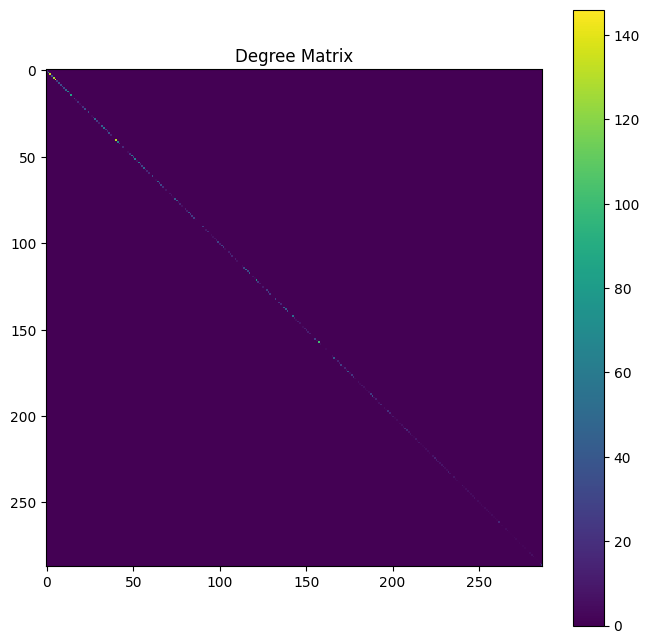

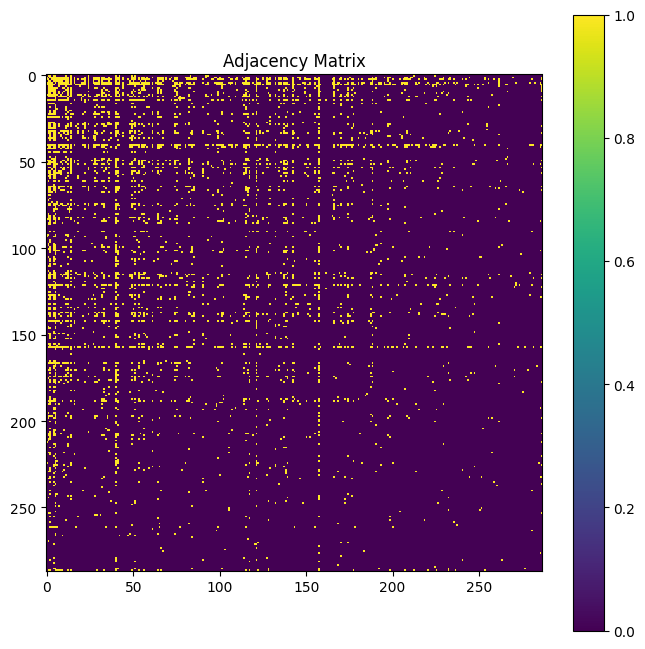

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(degree_matrix, cmap='viridis', interpolation='none')
plt.title('Degree Matrix')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(adjacency_matrix, cmap='viridis', interpolation='none')
plt.title('Adjacency Matrix')
plt.colorbar()
plt.show()